<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [188]:
# Imports Required Libraries
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score,roc_auc_score,classification_report,auc
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# load persons Dataset
df = pd.read_csv('adult.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


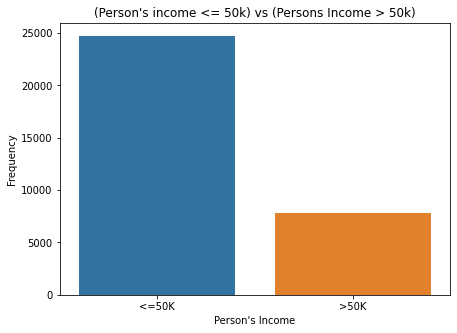

In [189]:
#Data Visualisation
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='income', data=df)
_ = plt.title('(Person\'s income <= 50k) vs (Persons Income > 50k)')
_ = plt.xlabel('Person\'s Income')
_ = plt.ylabel('Frequency')

In [190]:
#More Data Visualisation
#p=sns.pairplot(df, hue = 'income')

In [191]:
df["workclass"] = df["workclass"].replace('?','unknown')
df["occupation"] = df["occupation"].replace('?','unknown')


# the first note is that you need to replace unknown values with a mode or drop that "unknown" instances; if not then they will ranked in an ordinal variables whiich does not make sense
# second you need to ordinal encode the odinal variables not just one-hot-encode them; OrdinalEncoder class with catgories parameters can be used
# the 3rd is that cetagorical data acannot be ordered but should be one-hot-encoded; if not algorithms will learn that their order matters; 



In [192]:
# get the dummy variables from te workclass feature
dummies = pd.get_dummies(df.workclass)
    
# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')
# drop the workclass features as it is not needed anymore
# Also drop one of the dummy variables to avoid the dummy variable trap (the value any new column can be deduced from the other new ones)
df=merged.drop(columns=['workclass', 'unknown'])

# print the dataframe info for verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   fnlwgt            32561 non-null  int64 
 2   education         32561 non-null  object
 3   education.num     32561 non-null  int64 
 4   marital.status    32561 non-null  object
 5   occupation        32561 non-null  object
 6   relationship      32561 non-null  object
 7   race              32561 non-null  object
 8   sex               32561 non-null  object
 9   capital.gain      32561 non-null  int64 
 10  capital.loss      32561 non-null  int64 
 11  hours.per.week    32561 non-null  int64 
 12  native.country    32561 non-null  object
 13  income            32561 non-null  object
 14  Federal-gov       32561 non-null  uint8 
 15  Local-gov         32561 non-null  uint8 
 16  Never-worked      32561 non-null  uint8 
 17  Private     

In [193]:
from sklearn.model_selection import GridSearchCV # needd about 20 minutes to run


In [194]:
# get the dummy variables from te marital.status feature
dummies = pd.get_dummies(df["marital.status"])

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')
# drop the education features as it is not neded anymore
# Also drop one of the dummy variables to avoid the dummy variaable trap (the value any new column can be deduced from the other new ones)
df=merged.drop(columns=['marital.status', 'Widowed'])


In [195]:
# get the dummy variables from te occupation feature
dummies = pd.get_dummies(df.occupation)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')
# drop the education features as it is not neded anymore
# Also drop one of the dummy variables to avoid the dummy variaable trap (the value any new column can be deduced from the other new ones)
df=merged.drop(columns=['occupation', 'unknown'])

# print the dataframe info for verification
#df.info()

In [196]:
# get the dummy variables from te relationship feature
dummies = pd.get_dummies(df.relationship)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')
# drop the education features as it is not neded anymore
# Also drop one of the dummy variables to avoid the dummy variaable trap (the value any new column can be deduced from the other new ones)
df=merged.drop(columns=['relationship','Not-in-family'])


In [197]:
# get the dummy variables from te race feature
dummies = pd.get_dummies(df.race)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')
# drop the education features as it is not neded anymore
# Also drop one of the dummy variables to avoid the dummy variaable trap (the value any new column can be deduced from the other new ones)
df=merged.drop(columns=['race', 'Other'])


In [198]:
# get the dummy variables from te sex feature
dummies = pd.get_dummies(df.sex)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')
# drop the sex features as it is not neded anymore
# Also drop one of the dummy variables to avoid the dummy variaable trap (the value any new column can be deduced from the other new ones)
df=merged.drop(columns=['sex', 'Male'])


In [199]:
# code the label/outcome to 0 and 1
df["income"] = df["income"].replace('<=50K', 0)
df["income"] = df["income"].replace('>50K', 1)

In [200]:
df["education"] = df["education"].replace('10th', 1)
df["education"] = df["education"].replace('11th', 2)
df["education"] = df["education"].replace('12th', 3)
df["education"] = df["education"].replace('1st-4th', 4)
df["education"] = df["education"].replace('5th-6th', 5)
df["education"] = df["education"].replace('7th-8th', 6)
df["education"] = df["education"].replace('9th', 7)
df["education"] = df["education"].replace('Assoc-acdm', 8)
df["education"] = df["education"].replace('Assoc-voc', 9)
df["education"] = df["education"].replace('Bachelors', 10)
df["education"] = df["education"].replace('Some-college', 11)
df["education"] = df["education"].replace('Prof-school', 12)
df["education"] = df["education"].replace('Masters', 13)
df["education"] = df["education"].replace('HS-grad', 14)
df["education"] = df["education"].replace('Doctorate', 15)
df["education"] = df["education"].replace('Preschool', 16)

#drop two irrelevant features
df =df.drop(["native.country"], axis =1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    32561 non-null  int64
 1   fnlwgt                 32561 non-null  int64
 2   education              32561 non-null  int64
 3   education.num          32561 non-null  int64
 4   capital.gain           32561 non-null  int64
 5   capital.loss           32561 non-null  int64
 6   hours.per.week         32561 non-null  int64
 7   income                 32561 non-null  int64
 8   Federal-gov            32561 non-null  uint8
 9   Local-gov              32561 non-null  uint8
 10  Never-worked           32561 non-null  uint8
 11  Private                32561 non-null  uint8
 12  Self-emp-inc           32561 non-null  uint8
 13  Self-emp-not-inc       32561 non-null  uint8
 14  State-gov              32561 non-null  uint8
 15  Without-pay            32561 non-nul

In [201]:
#display a corelation matrix that will allow us to notice the imprtant features that are highly correlated with the outcome (i.e., the income in this problem)
# A correlation coefficient close to zero indicates an uncorrelated/marginal feature in relation to the outcome
correlation_matrix = df.corr()
correlation_matrix["income"]

age                      0.234037
fnlwgt                  -0.009463
education                0.090447
education.num            0.335154
capital.gain             0.223329
capital.loss             0.150526
hours.per.week           0.229689
income                   1.000000
Federal-gov              0.059372
Local-gov                0.033091
Never-worked            -0.008259
Private                 -0.078528
Self-emp-inc             0.139467
Self-emp-not-inc         0.030019
State-gov                0.014843
Without-pay             -0.011681
Divorced                -0.126995
Married-AF-spouse        0.012061
Married-civ-spouse       0.444696
Married-spouse-absent   -0.042532
Never-married           -0.318440
Separated               -0.074386
Adm-clerical            -0.089986
Armed-Forces            -0.005044
Craft-repair            -0.012576
Exec-managerial          0.214861
Farming-fishing         -0.051925
Handlers-cleaners       -0.087265
Machine-op-inspct       -0.069401
Other-service 

In [202]:
# Prepare the feature vector x and the class vector y 
#x = df.values # INCORRECT : need to drop income 
x = df.drop(['income'], axis=1).values
y = df['income'].values
x

array([[    90,  77053,     14, ...,      0,      1,      1],
       [    82, 132870,     14, ...,      0,      1,      1],
       [    66, 186061,     11, ...,      1,      0,      1],
       ...,
       [    40, 154374,     14, ...,      0,      1,      0],
       [    58, 151910,     14, ...,      0,      1,      1],
       [    22, 201490,     14, ...,      0,      1,      0]], dtype=int64)

In [203]:
#scaling the whole dataset
scl = MinMaxScaler() #is it better thn StandardScaler
x = scl.fit_transform(x)
x

array([[1.        , 0.04398745, 0.86666667, ..., 0.        , 1.        ,
        1.        ],
       [0.89041096, 0.08189579, 0.86666667, ..., 0.        , 1.        ,
        1.        ],
       [0.67123288, 0.11802067, 0.66666667, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.31506849, 0.09650032, 0.86666667, ..., 0.        , 1.        ,
        0.        ],
       [0.56164384, 0.09482688, 0.86666667, ..., 0.        , 1.        ,
        1.        ],
       [0.06849315, 0.12849934, 0.86666667, ..., 0.        , 1.        ,
        0.        ]])

k=1, SSE=100665.00422304912
k=2, SSE=79500.4661585721
k=3, SSE=71602.48788818745
k=4, SSE=67865.22238230314
k=5, SSE=65021.58351581503
k=6, SSE=61272.519285730545


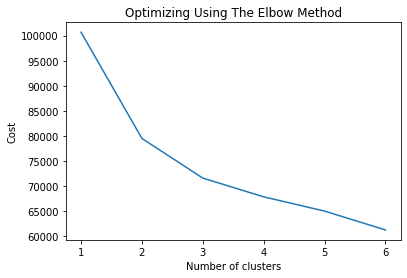

In [209]:
# finding the best K: Elbow method 
sse = [] #n array to store the sum of square error
number_clusters = range(1,7)
for i in range(1, 7):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)    
    sse.append(km.inertia_) # append the intertia: intertia=the sum of squared distance of samples to their closest cluster center
    print('k={}, SSE={}'.format(i, km.inertia_))
  
plt.plot(range(1,7), sse)
plt.title('Optimizing Using The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

In [225]:

# finding the best K: GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

clusters = KMeans(n_clusters=2,random_state=42)

params = {
            'n_clusters': [2, 3, 5, 7,9,11,13,15]
            }
gridcv = GridSearchCV(clusters, params, cv = 10, scoring='accuracy')



In [226]:
#fit the dataset

#clstr = clusters.fit(x_new)
optimalmodel = gridcv.fit(x,y)



In [252]:
optimalmodel

GridSearchCV(cv=10, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'n_clusters': [2, 3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [253]:
best_model=optimalmodel.best_estimator_
print ('best estimator=',best_model)
y_pred=optimalmodel.predict(x)
y_pred



best estimator= KMeans(n_clusters=2, random_state=42)


array([0, 0, 0, ..., 1, 0, 0])

In [254]:
# trasnform assigns for each instance a score per cluster (in our case, two scores)
y_pred=optimalmodel.transform(x)
y_pred



array([[1.72145574, 2.22577516],
       [1.78729341, 2.29358543],
       [2.13182369, 2.70201566],
       ...,
       [1.94832783, 1.09095225],
       [1.54082006, 2.29107979],
       [1.4775938 , 2.31355322]])

In [258]:
clusters=best_model.cluster_centers_
clusters

array([[ 2.46941133e-01,  1.21704222e-01,  6.44708816e-01,
         5.94510537e-01,  5.88028894e-03,  1.43104640e-02,
         3.76473307e-01,  2.74819471e-02,  6.37435711e-02,
         3.63655255e-04,  7.29232687e-01,  1.69878955e-02,
         5.12234402e-02,  4.06774378e-02,  4.67556756e-04,
         2.30817185e-01,  7.27310510e-04,  8.69136059e-02,
         2.17154138e-02,  5.54989870e-01,  5.32495195e-02,
         1.64008520e-01,  3.11704504e-04,  8.10431711e-02,
         9.68881500e-02,  2.25466258e-02,  4.81063951e-02,
         5.74575303e-02,  1.43955530e-01,  7.68871110e-03,
         1.20785495e-01,  1.41825549e-02,  1.10603148e-01,
         2.99755831e-02,  3.22614162e-02,  6.71684930e-15,
         4.73271339e-02,  2.61468128e-01,  1.79022287e-01,
         8.13548756e-02,  1.12213621e-02,  3.19497117e-02,
         1.27331290e-01,  8.19782846e-01,  5.59509585e-01],
       [ 3.66055552e-01,  1.18869606e-01,  6.69786659e-01,
         6.21093750e-01,  1.78566006e-02,  2.83302285e-

In [256]:
# we can assign a new instance to a cluster by using the .predict ()